In [1]:
import requests
import pandas as pd
from src.config import DATASET_ROOT_PATH, PUBLIC_HOLIDAYS_URL

In [2]:
year = 2017
r = requests.get(f'{PUBLIC_HOLIDAYS_URL}/{year}/BR')
r.headers['content-type']

'application/json; charset=utf-8'

In [3]:
r.json()

[{'date': '2017-01-01',
  'localName': 'Confraternização Universal',
  'name': "New Year's Day",
  'countryCode': 'BR',
  'fixed': False,
  'global': True,
  'counties': None,
  'launchYear': None,
  'types': ['Public']},
 {'date': '2017-02-27',
  'localName': 'Carnaval',
  'name': 'Carnival',
  'countryCode': 'BR',
  'fixed': False,
  'global': True,
  'counties': None,
  'launchYear': None,
  'types': ['Bank', 'Optional']},
 {'date': '2017-02-28',
  'localName': 'Carnaval',
  'name': 'Carnival',
  'countryCode': 'BR',
  'fixed': False,
  'global': True,
  'counties': None,
  'launchYear': None,
  'types': ['Bank', 'Optional']},
 {'date': '2017-04-14',
  'localName': 'Sexta-feira Santa',
  'name': 'Good Friday',
  'countryCode': 'BR',
  'fixed': False,
  'global': True,
  'counties': None,
  'launchYear': None,
  'types': ['Public']},
 {'date': '2017-04-16',
  'localName': 'Domingo de Páscoa',
  'name': 'Easter Sunday',
  'countryCode': 'BR',
  'fixed': False,
  'global': True,
  'cou

In [4]:
df = pd.DataFrame(r.json())
df

,date,localName,name,countryCode,fixed,global,counties,launchYear,types
0,2017-01-01,Confraternização Universal,New Year's Day,BR,False,True,None,None,[Public]
1,2017-02-27,Carnaval,Carnival,BR,False,True,None,None,"[Bank, Optional]"
2,2017-02-28,Carnaval,Carnival,BR,False,True,None,None,"[Bank, Optional]"
3,2017-04-14,Sexta-feira Santa,Good Friday,BR,False,True,None,None,[Public]
4,2017-04-16,Domingo de Páscoa,Easter Sunday,BR,False,True,None,None,[Public]
5,2017-04-21,Dia de Tiradentes,Tiradentes,BR,False,True,None,None,[Public]
6,2017-05-01,Dia do Trabalhador,Labour Day,BR,False,True,None,None,[Public]
7,2017-06-15,Corpus Christi,Corpus Christi,BR,False,True,None,None,[Public]
8,2017-07-09,Revolução Constitucionalista de 1932,Constitutionalist Revolution of 1932,BR,False,False,[BR-SP],None,[Public]
9,2017-09-07,Dia da Independência,Independence Day,BR,False,True,None,None,[Public]


In [13]:
df['localName'].value_counts()

Carnaval                                2
Confraternização Universal              1
Sexta-feira Santa                       1
Domingo de Páscoa                       1
Dia de Tiradentes                       1
Dia do Trabalhador                      1
Corpus Christi                          1
Revolução Constitucionalista de 1932    1
Dia da Independência                    1
Nossa Senhora Aparecida                 1
Dia de Finados                          1
Proclamação da República                1
Natal                                   1
Name: localName, dtype: int64

In [5]:
df.columns

Index(['date', 'localName', 'name', 'countryCode', 'fixed', 'global',
       'counties', 'launchYear', 'types'],
      dtype='object')

In [6]:
df.drop(columns=['counties', 'types'], inplace=True)

In [7]:
df

,date,localName,name,countryCode,fixed,global,launchYear
0,2017-01-01,Confraternização Universal,New Year's Day,BR,False,True,None
1,2017-02-27,Carnaval,Carnival,BR,False,True,None
2,2017-02-28,Carnaval,Carnival,BR,False,True,None
3,2017-04-14,Sexta-feira Santa,Good Friday,BR,False,True,None
4,2017-04-16,Domingo de Páscoa,Easter Sunday,BR,False,True,None
5,2017-04-21,Dia de Tiradentes,Tiradentes,BR,False,True,None
6,2017-05-01,Dia do Trabalhador,Labour Day,BR,False,True,None
7,2017-06-15,Corpus Christi,Corpus Christi,BR,False,True,None
8,2017-07-09,Revolução Constitucionalista de 1932,Constitutionalist Revolution of 1932,BR,False,False,None
9,2017-09-07,Dia da Independência,Independence Day,BR,False,True,None


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14 entries, 0 to 13
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   date         14 non-null     object
 1   localName    14 non-null     object
 2   name         14 non-null     object
 3   countryCode  14 non-null     object
 4   fixed        14 non-null     bool  
 5   global       14 non-null     bool  
 6   launchYear   0 non-null      object
dtypes: bool(2), object(5)
memory usage: 716.0+ bytes


In [12]:
df.date = pd.to_datetime(df.date)
df.date

0    2017-01-01
1    2017-02-27
2    2017-02-28
3    2017-04-14
4    2017-04-16
5    2017-04-21
6    2017-05-01
7    2017-06-15
8    2017-07-09
9    2017-09-07
10   2017-10-12
11   2017-11-02
12   2017-11-15
13   2017-12-25
Name: date, dtype: datetime64[ns]

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14 entries, 0 to 13
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   date         14 non-null     datetime64[ns]
 1   localName    14 non-null     object        
 2   name         14 non-null     object        
 3   countryCode  14 non-null     object        
 4   fixed        14 non-null     bool          
 5   global       14 non-null     bool          
 6   launchYear   0 non-null      object        
dtypes: bool(2), datetime64[ns](1), object(4)
memory usage: 716.0+ bytes


In [11]:
print(r.raise_for_status())

None


In [3]:
# Importing the necessary libraries
from pandas import DataFrame
from sqlalchemy import create_engine
from typing import Dict
from pathlib import Path

from src.transform import QueryEnum
from src import config
from src.transform import run_queries
from src.extract import extract
from src.load import load
from src.plots import (
    plot_freight_value_weight_relationship,
    plot_global_amount_order_status,
    plot_real_vs_predicted_delivered_time,
    plot_revenue_by_month_year,
    plot_revenue_per_state,
    plot_top_10_least_revenue_categories,
    plot_top_10_revenue_categories,
    plot_top_10_revenue_categories_ammount,
    plot_delivery_date_difference,
    plot_order_amount_per_day_with_holidays,
)

from collections import namedtuple
from enum import Enum
from typing import Callable, Dict, List

import pandas as pd
from pandas import DataFrame, read_sql
from sqlalchemy import text
from sqlalchemy.engine.base import Engine

from src.config import QUERIES_ROOT_PATH

In [4]:
csv_folder = config.DATASET_ROOT_PATH
public_holidays_url = config.PUBLIC_HOLIDAYS_URL

# 1. Get the mapping of the csv files to the table names.
csv_table_mapping = config.get_csv_to_table_mapping()

# 2. Extract the data from the csv files, holidays and load them into the dataframes.
csv_dataframes = extract(csv_folder, csv_table_mapping, public_holidays_url)

In [5]:
"""Initialize the database for testing."""
engine = create_engine("sqlite://")
csv_folder = config.DATASET_ROOT_PATH
public_holidays_url = config.PUBLIC_HOLIDAYS_URL
csv_table_mapping = config.get_csv_to_table_mapping()
csv_dataframes = extract(csv_folder, csv_table_mapping, public_holidays_url)
load(data_frames=csv_dataframes, database=engine)

In [6]:
query_results: Dict[str, DataFrame] = run_queries(database=engine)

In [7]:
# Create the database sql file
Path(config.SQLITE_BD_ABSOLUTE_PATH).touch()

# Create the database connection
ENGINE = create_engine(rf"sqlite:///{config.SQLITE_BD_ABSOLUTE_PATH}", echo=False)

In [8]:
query_name = QueryEnum.ORDERS_PER_DAY_AND_HOLIDAYS_2017.value
query_name

'orders_per_day_and_holidays_2017'

In [9]:
holidays = read_sql("SELECT * FROM public_holidays", engine)
holidays

,index,date,localName,name,countryCode,fixed,global,launchYear
0,0,2017-01-01 00:00:00.000000,Confraternização Universal,New Year's Day,BR,0,1,None
1,1,2017-02-27 00:00:00.000000,Carnaval,Carnival,BR,0,1,None
2,2,2017-02-28 00:00:00.000000,Carnaval,Carnival,BR,0,1,None
3,3,2017-04-14 00:00:00.000000,Sexta-feira Santa,Good Friday,BR,0,1,None
4,4,2017-04-16 00:00:00.000000,Domingo de Páscoa,Easter Sunday,BR,0,1,None
5,5,2017-04-21 00:00:00.000000,Dia de Tiradentes,Tiradentes,BR,0,1,None
6,6,2017-05-01 00:00:00.000000,Dia do Trabalhador,Labour Day,BR,0,1,None
7,7,2017-06-15 00:00:00.000000,Corpus Christi,Corpus Christi,BR,0,1,None
8,8,2017-07-09 00:00:00.000000,Revolução Constitucionalista de 1932,Constitutionalist Revolution of 1932,BR,0,0,None
9,9,2017-09-07 00:00:00.000000,Dia da Independência,Independence Day,BR,0,1,None


In [10]:
orders = read_sql("SELECT * FROM olist_orders", engine)
orders

,index,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00
...,...,...,...,...,...,...,...,...,...
99436,99436,9c5dedf39a927c1b2549525ed64a053c,39bd1228ee8140590ac3aca26f2dfe00,delivered,2017-03-09 09:54:05,2017-03-09 09:54:05,2017-03-10 11:18:03,2017-03-17 15:08:01,2017-03-28 00:00:00
99437,99437,63943bddc261676b46f01ca7ac2f7bd8,1fca14ff2861355f6e5f14306ff977a7,delivered,2018-02-06 12:58:58,2018-02-06 13:10:37,2018-02-07 23:22:42,2018-02-28 17:37:56,2018-03-02 00:00:00
99438,99438,83c1379a015df1e13d02aae0204711ab,1aa71eb042121263aafbe80c1b562c9c,delivered,2017-08-27 14:46:43,2017-08-27 15:04:16,2017-08-28 20:52:26,2017-09-21 11:24:17,2017-09-27 00:00:00
99439,99439,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,2018-01-08 21:28:27,2018-01-08 21:36:21,2018-01-12 15:35:03,2018-01-25 23:32:54,2018-02-15 00:00:00


In [11]:
orders["order_purchase_timestamp"] = pd.to_datetime(orders["order_purchase_timestamp"])
orders["order_purchase_timestamp"]

0       2017-10-02 10:56:33
1       2018-07-24 20:41:37
2       2018-08-08 08:38:49
3       2017-11-18 19:28:06
4       2018-02-13 21:18:39
                ...        
99436   2017-03-09 09:54:05
99437   2018-02-06 12:58:58
99438   2017-08-27 14:46:43
99439   2018-01-08 21:28:27
99440   2018-03-08 20:57:30
Name: order_purchase_timestamp, Length: 99441, dtype: datetime64[ns]

In [12]:
filtered_dates = orders[orders['order_purchase_timestamp'].dt.year == 2017]
filtered_dates

,index,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
3,3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
5,5,a4591c265e18cb1dcee52889e2d8acc3,503740e9ca751ccdda7ba28e9ab8f608,delivered,2017-07-09 21:57:05,2017-07-09 22:10:13,2017-07-11 14:58:04,2017-07-26 10:57:55,2017-08-01 00:00:00
6,6,136cce7faa42fdb2cefd53fdc79a6098,ed0271e0b7da060a393796590e7b737a,invoiced,2017-04-11 12:22:08,2017-04-13 13:25:17,None,None,2017-05-09 00:00:00
7,7,6514b8ad8028c9f2cc2374ded245783f,9bdf08b4b3b52b5526ff42d37d47f222,delivered,2017-05-16 13:10:30,2017-05-16 13:22:11,2017-05-22 10:07:46,2017-05-26 12:55:51,2017-06-07 00:00:00
...,...,...,...,...,...,...,...,...,...
99433,99433,9115830be804184b91f5c00f6f49f92d,da2124f134f5dfbce9d06f29bdb6c308,delivered,2017-10-04 19:57:37,2017-10-04 20:07:14,2017-10-05 16:52:52,2017-10-20 20:25:45,2017-11-07 00:00:00
99434,99434,aa04ef5214580b06b10e2a378300db44,f01a6bfcc730456317e4081fe0c9940e,delivered,2017-01-27 00:30:03,2017-01-27 01:05:25,2017-01-30 11:40:16,2017-02-07 13:15:25,2017-03-17 00:00:00
99435,99435,880675dff2150932f1601e1c07eadeeb,47cd45a6ac7b9fb16537df2ccffeb5ac,delivered,2017-02-23 09:05:12,2017-02-23 09:15:11,2017-03-01 10:22:52,2017-03-06 11:08:08,2017-03-22 00:00:00
99436,99436,9c5dedf39a927c1b2549525ed64a053c,39bd1228ee8140590ac3aca26f2dfe00,delivered,2017-03-09 09:54:05,2017-03-09 09:54:05,2017-03-10 11:18:03,2017-03-17 15:08:01,2017-03-28 00:00:00


In [13]:
order_purchase_ammount_per_date = filtered_dates['order_purchase_timestamp'].dt.date.value_counts()
order_purchase_ammount_per_date

2017-11-24    1176
2017-11-25     499
2017-11-27     403
2017-11-26     391
2017-11-28     380
              ... 
2017-01-08       6
2017-01-10       6
2017-01-09       5
2017-01-07       4
2017-01-06       4
Name: order_purchase_timestamp, Length: 361, dtype: int64

In [14]:
import numpy as np
pd.to_datetime(order_purchase_ammount_per_date.index).astype(np.int64) // 10 ** 6

Int64Index([1511481600000, 1511568000000, 1511740800000, 1511654400000,
            1511827200000, 1512345600000, 1511913600000, 1511395200000,
            1512432000000, 1512518400000,
            ...
            1484352000000, 1484438400000, 1484179200000, 1484265600000,
            1484092800000, 1483833600000, 1484006400000, 1483920000000,
            1483747200000, 1483660800000],
           dtype='int64', length=361)

In [15]:
pd.DataFrame(order_purchase_ammount_per_date.values, columns=['order_count'])


,order_count
0,1176
1,499
2,403
3,391
4,380
...,...
356,6
357,6
358,5
359,4


In [16]:
holidays['date'] = pd.to_datetime(holidays['date']).dt.date
holidays_dates = holidays['date'].to_list()
holidays_dates

[datetime.date(2017, 1, 1),
 datetime.date(2017, 2, 27),
 datetime.date(2017, 2, 28),
 datetime.date(2017, 4, 14),
 datetime.date(2017, 4, 16),
 datetime.date(2017, 4, 21),
 datetime.date(2017, 5, 1),
 datetime.date(2017, 6, 15),
 datetime.date(2017, 7, 9),
 datetime.date(2017, 9, 7),
 datetime.date(2017, 10, 12),
 datetime.date(2017, 11, 2),
 datetime.date(2017, 11, 15),
 datetime.date(2017, 12, 25)]

In [17]:
order_purchase_ammount_per_date.index.values

array([datetime.date(2017, 11, 24), datetime.date(2017, 11, 25),
       datetime.date(2017, 11, 27), datetime.date(2017, 11, 26),
       datetime.date(2017, 11, 28), datetime.date(2017, 12, 4),
       datetime.date(2017, 11, 29), datetime.date(2017, 11, 23),
       datetime.date(2017, 12, 5), datetime.date(2017, 12, 6),
       datetime.date(2017, 12, 1), datetime.date(2017, 12, 11),
       datetime.date(2017, 11, 30), datetime.date(2017, 12, 12),
       datetime.date(2017, 12, 3), datetime.date(2017, 11, 20),
       datetime.date(2017, 12, 7), datetime.date(2017, 11, 21),
       datetime.date(2017, 11, 16), datetime.date(2017, 12, 8),
       datetime.date(2017, 12, 13), datetime.date(2017, 12, 2),
       datetime.date(2017, 12, 18), datetime.date(2017, 9, 13),
       datetime.date(2017, 9, 12), datetime.date(2017, 11, 13),
       datetime.date(2017, 10, 17), datetime.date(2017, 11, 22),
       datetime.date(2017, 12, 14), datetime.date(2017, 10, 3),
       datetime.date(2017, 11, 17), 

In [18]:
order_purchase_ammount_per_date.index.isin(holidays_dates)
#order_purchase_ammount_per_date.index.isin(holidays_dates)

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False,  True, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False,  True, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False,

In [19]:
result_df = pd.DataFrame({'order_count':order_purchase_ammount_per_date.values, 'date':pd.to_datetime(order_purchase_ammount_per_date.index.values).astype(np.int64) // 10 ** 6, 'holiday': order_purchase_ammount_per_date.index.isin(holidays_dates)})
result_df = result_df.sort_values(by='date')

In [20]:
result_df

,order_count,date,holiday
343,32,1483574400000,False
360,4,1483660800000,False
359,4,1483747200000,False
356,6,1483833600000,False
358,5,1483920000000,False
...,...,...,...
56,167,1514332800000,False
107,146,1514419200000,False
134,135,1514505600000,False
238,97,1514592000000,False


In [16]:
query_name = QueryEnum.GET_FREIGHT_VALUE_WEIGHT_RELATIONSHIP.value

# Get orders from olist_orders table
orders = read_sql("SELECT * FROM olist_orders", engine)

# Get items from olist_order_items table
items = read_sql("SELECT * FROM olist_order_items", engine)

# Get products from olist_products table
products = read_sql("SELECT * FROM olist_products", engine)

In [23]:
items

,index,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14
...,...,...,...,...,...,...,...,...
112645,112645,fffc94f6ce00a00581880bf54a75a037,1,4aa6014eceb682077f9dc4bffebc05b0,b8bc237ba3788b23da09c0f1f3a3288c,2018-05-02 04:11:01,299.99,43.41
112646,112646,fffcd46ef2263f404302a634eb57f7eb,1,32e07fd915822b0765e448c4dd74c828,f3c38ab652836d21de61fb8314b69182,2018-07-20 04:31:48,350.00,36.53
112647,112647,fffce4705a9662cd70adb13d4a31832d,1,72a30483855e2eafc67aee5dc2560482,c3cfdc648177fdbbbb35635a37472c53,2017-10-30 17:14:25,99.90,16.95
112648,112648,fffe18544ffabc95dfada21779c9644f,1,9c422a519119dcad7575db5af1ba540e,2b3e4a2a3ea8e01938cabda2a3e5cc79,2017-08-21 00:04:32,55.99,8.72


In [24]:
products

,index,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0
...,...,...,...,...,...,...,...,...,...,...
32946,32946,a0b7d5a992ccda646f2d34e418fff5a0,moveis_decoracao,45.0,67.0,2.0,12300.0,40.0,40.0,40.0
32947,32947,bf4538d88321d0fd4412a93c974510e6,construcao_ferramentas_iluminacao,41.0,971.0,1.0,1700.0,16.0,19.0,16.0
32948,32948,9a7c6041fa9592d9d9ef6cfe62a71f8c,cama_mesa_banho,50.0,799.0,1.0,1400.0,27.0,7.0,27.0
32949,32949,83808703fc0706a22e264b9d75f04a2e,informatica_acessorios,60.0,156.0,2.0,700.0,31.0,13.0,20.0


In [25]:
orders

,index,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00
...,...,...,...,...,...,...,...,...,...
99436,99436,9c5dedf39a927c1b2549525ed64a053c,39bd1228ee8140590ac3aca26f2dfe00,delivered,2017-03-09 09:54:05,2017-03-09 09:54:05,2017-03-10 11:18:03,2017-03-17 15:08:01,2017-03-28 00:00:00
99437,99437,63943bddc261676b46f01ca7ac2f7bd8,1fca14ff2861355f6e5f14306ff977a7,delivered,2018-02-06 12:58:58,2018-02-06 13:10:37,2018-02-07 23:22:42,2018-02-28 17:37:56,2018-03-02 00:00:00
99438,99438,83c1379a015df1e13d02aae0204711ab,1aa71eb042121263aafbe80c1b562c9c,delivered,2017-08-27 14:46:43,2017-08-27 15:04:16,2017-08-28 20:52:26,2017-09-21 11:24:17,2017-09-27 00:00:00
99439,99439,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,2018-01-08 21:28:27,2018-01-08 21:36:21,2018-01-12 15:35:03,2018-01-25 23:32:54,2018-02-15 00:00:00


In [26]:
# TODO: Merge items, orders and products tables on 'order_id'/'product_id'.
# We suggest to use pandas.merge() function.
# Assign the result to the `data` variable.
data = items.merge(orders, left_on='order_id', right_on='order_id')
data

,index_x,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,index_y,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29,85267,3ce436f183e68e07877b285a838db11a,delivered,2017-09-13 08:59:02,2017-09-13 09:45:35,2017-09-19 18:34:16,2017-09-20 23:43:48,2017-09-29 00:00:00
1,1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93,71853,f6dd3ec061db4e3987629fe6b26e5cce,delivered,2017-04-26 10:53:06,2017-04-26 11:05:13,2017-05-04 14:35:00,2017-05-12 16:04:24,2017-05-15 00:00:00
2,2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87,6298,6489ae5e4333f3693df5ad4372dab6d3,delivered,2018-01-14 14:33:31,2018-01-14 14:48:30,2018-01-16 12:36:48,2018-01-22 13:19:16,2018-02-05 00:00:00
3,3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79,22550,d4eb9395c8c0431ee92fce09860c5a06,delivered,2018-08-08 10:00:35,2018-08-08 10:10:18,2018-08-10 13:28:00,2018-08-14 13:32:39,2018-08-20 00:00:00
4,4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14,5247,58dbd0b2d70206bf40e62cd34e84d795,delivered,2017-02-04 13:57:51,2017-02-04 14:10:13,2017-02-16 09:46:09,2017-03-01 16:42:31,2017-03-17 00:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
112645,112645,fffc94f6ce00a00581880bf54a75a037,1,4aa6014eceb682077f9dc4bffebc05b0,b8bc237ba3788b23da09c0f1f3a3288c,2018-05-02 04:11:01,299.99,43.41,79550,b51593916b4b8e0d6f66f2ae24f2673d,delivered,2018-04-23 13:57:06,2018-04-25 04:11:01,2018-04-25 12:09:00,2018-05-10 22:56:40,2018-05-18 00:00:00
112646,112646,fffcd46ef2263f404302a634eb57f7eb,1,32e07fd915822b0765e448c4dd74c828,f3c38ab652836d21de61fb8314b69182,2018-07-20 04:31:48,350.00,36.53,70155,84c5d4fbaf120aae381fad077416eaa0,delivered,2018-07-14 10:26:46,2018-07-17 04:31:48,2018-07-17 08:05:00,2018-07-23 20:31:55,2018-08-01 00:00:00
112647,112647,fffce4705a9662cd70adb13d4a31832d,1,72a30483855e2eafc67aee5dc2560482,c3cfdc648177fdbbbb35635a37472c53,2017-10-30 17:14:25,99.90,16.95,52699,29309aa813182aaddc9b259e31b870e6,delivered,2017-10-23 17:07:56,2017-10-24 17:14:25,2017-10-26 15:13:14,2017-10-28 12:22:22,2017-11-10 00:00:00
112648,112648,fffe18544ffabc95dfada21779c9644f,1,9c422a519119dcad7575db5af1ba540e,2b3e4a2a3ea8e01938cabda2a3e5cc79,2017-08-21 00:04:32,55.99,8.72,59871,b5e6afd5a41800fdf401e0272ca74655,delivered,2017-08-14 23:02:59,2017-08-15 00:04:32,2017-08-15 19:02:53,2017-08-16 21:59:40,2017-08-25 00:00:00


In [27]:
data = data.merge(products, left_on='product_id', right_on='product_id')
data

,index_x,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,index_y,customer_id,...,order_estimated_delivery_date,index,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.9,13.29,85267,3ce436f183e68e07877b285a838db11a,...,2017-09-29 00:00:00,25865,cool_stuff,58.0,598.0,4.0,650.0,28.0,9.0,14.0
1,8346,130898c0987d1801452a8ed92a670612,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-07-05 02:44:11,55.9,17.96,64197,e6eecc5a77de221464d1c4eaff0a9b64,...,2017-07-26 00:00:00,25865,cool_stuff,58.0,598.0,4.0,650.0,28.0,9.0,14.0
2,36646,532ed5e14e24ae1f0d735b91524b98b9,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2018-05-23 10:56:25,64.9,18.33,10214,4ef55bf80f711b372afebcb7c715344a,...,2018-06-07 00:00:00,25865,cool_stuff,58.0,598.0,4.0,650.0,28.0,9.0,14.0
3,49108,6f8c31653edb8c83e1a739408b5ff750,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-08-07 18:55:08,58.9,16.17,59155,30407a72ad8b3f4df4d15369126b20c9,...,2017-08-25 00:00:00,25865,cool_stuff,58.0,598.0,4.0,650.0,28.0,9.0,14.0
4,55021,7d19f4ef4d04461989632411b7e588b9,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-08-16 22:05:11,58.9,13.29,41473,91a792fef70ecd8cc69d3c7feb3d12da,...,2017-09-01 00:00:00,25865,cool_stuff,58.0,598.0,4.0,650.0,28.0,9.0,14.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
112645,112613,ffebd80e3291e811c308365936897efd,1,4cc4d02efc8f249c13355147fb44e34d,d1c7fa84e48cfa21a0e595167c1c500e,2018-07-18 20:23:55,129.9,51.20,71011,050309b91cc5e04e68841938e7984aaf,...,2018-08-07 00:00:00,29144,ferramentas_jardim,37.0,653.0,1.0,6700.0,35.0,12.0,22.0
112646,112619,ffee31fb4b5e35c9123608015637c495,1,b10ecf8e33aaaea419a9fa860ea80fb5,0241d4d5d36f10f80c644447315af0bd,2018-08-21 10:10:11,99.0,13.52,91446,11e0f43ab4e2d2c48348dd9332c0ef80,...,2018-08-23 00:00:00,23588,moveis_decoracao,30.0,308.0,1.0,2300.0,37.0,30.0,20.0
112647,112632,fff7c4452f050315db1b3f24d9df5fcd,1,dd469c03ad67e201bc2179ef077dcd48,7e93a43ef30c4f03f38b393420bc753a,2017-06-07 17:05:23,736.0,20.91,79223,dec8952e97ef6124259c56914fb3569c,...,2017-06-26 00:00:00,7898,relogios_presentes,33.0,658.0,3.0,400.0,19.0,9.0,15.0
112648,112637,fffa82886406ccf10c7b4e35c4ff2788,1,bbe7651fef80287a816ead73f065fc4b,8f2ce03f928b567e3d56181ae20ae952,2017-12-22 17:31:42,229.9,44.02,49906,a5201e1a6d71a8d21e869151bd5b4085,...,2018-01-24 00:00:00,28548,esporte_lazer,32.0,280.0,2.0,2700.0,60.0,15.0,15.0


In [28]:
# TODO: Get only delivered orders.
# Using the previous results from the merge (stored in `data` variable),
# apply a boolean mask to keep only the 'delivered' orders.
# Assign the result to the variable `delivered`.
delivered = data[data['order_status'] == 'delivered']
delivered


,index_x,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,index_y,customer_id,...,order_estimated_delivery_date,index,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.9,13.29,85267,3ce436f183e68e07877b285a838db11a,...,2017-09-29 00:00:00,25865,cool_stuff,58.0,598.0,4.0,650.0,28.0,9.0,14.0
1,8346,130898c0987d1801452a8ed92a670612,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-07-05 02:44:11,55.9,17.96,64197,e6eecc5a77de221464d1c4eaff0a9b64,...,2017-07-26 00:00:00,25865,cool_stuff,58.0,598.0,4.0,650.0,28.0,9.0,14.0
2,36646,532ed5e14e24ae1f0d735b91524b98b9,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2018-05-23 10:56:25,64.9,18.33,10214,4ef55bf80f711b372afebcb7c715344a,...,2018-06-07 00:00:00,25865,cool_stuff,58.0,598.0,4.0,650.0,28.0,9.0,14.0
3,49108,6f8c31653edb8c83e1a739408b5ff750,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-08-07 18:55:08,58.9,16.17,59155,30407a72ad8b3f4df4d15369126b20c9,...,2017-08-25 00:00:00,25865,cool_stuff,58.0,598.0,4.0,650.0,28.0,9.0,14.0
4,55021,7d19f4ef4d04461989632411b7e588b9,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-08-16 22:05:11,58.9,13.29,41473,91a792fef70ecd8cc69d3c7feb3d12da,...,2017-09-01 00:00:00,25865,cool_stuff,58.0,598.0,4.0,650.0,28.0,9.0,14.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
112645,112613,ffebd80e3291e811c308365936897efd,1,4cc4d02efc8f249c13355147fb44e34d,d1c7fa84e48cfa21a0e595167c1c500e,2018-07-18 20:23:55,129.9,51.20,71011,050309b91cc5e04e68841938e7984aaf,...,2018-08-07 00:00:00,29144,ferramentas_jardim,37.0,653.0,1.0,6700.0,35.0,12.0,22.0
112646,112619,ffee31fb4b5e35c9123608015637c495,1,b10ecf8e33aaaea419a9fa860ea80fb5,0241d4d5d36f10f80c644447315af0bd,2018-08-21 10:10:11,99.0,13.52,91446,11e0f43ab4e2d2c48348dd9332c0ef80,...,2018-08-23 00:00:00,23588,moveis_decoracao,30.0,308.0,1.0,2300.0,37.0,30.0,20.0
112647,112632,fff7c4452f050315db1b3f24d9df5fcd,1,dd469c03ad67e201bc2179ef077dcd48,7e93a43ef30c4f03f38b393420bc753a,2017-06-07 17:05:23,736.0,20.91,79223,dec8952e97ef6124259c56914fb3569c,...,2017-06-26 00:00:00,7898,relogios_presentes,33.0,658.0,3.0,400.0,19.0,9.0,15.0
112648,112637,fffa82886406ccf10c7b4e35c4ff2788,1,bbe7651fef80287a816ead73f065fc4b,8f2ce03f928b567e3d56181ae20ae952,2017-12-22 17:31:42,229.9,44.02,49906,a5201e1a6d71a8d21e869151bd5b4085,...,2018-01-24 00:00:00,28548,esporte_lazer,32.0,280.0,2.0,2700.0,60.0,15.0,15.0


In [29]:
delivered.columns

Index(['index_x', 'order_id', 'order_item_id', 'product_id', 'seller_id',
       'shipping_limit_date', 'price', 'freight_value', 'index_y',
       'customer_id', 'order_status', 'order_purchase_timestamp',
       'order_approved_at', 'order_delivered_carrier_date',
       'order_delivered_customer_date', 'order_estimated_delivery_date',
       'index', 'product_category_name', 'product_name_lenght',
       'product_description_lenght', 'product_photos_qty', 'product_weight_g',
       'product_length_cm', 'product_height_cm', 'product_width_cm'],
      dtype='object')

In [30]:
#delivered['freight_value'].sum()

#[['order_id','freight_value', 'product_weight_g']]

In [31]:
pd.DataFrame(delivered.groupby('order_id').sum()).index

/var/folders/h5/hl0smvg55bg472wz0t67gmnh0000gn/T/ipykernel_21881/2424023504.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  pd.DataFrame(delivered.groupby('order_id').sum()).index


Index(['00010242fe8c5a6d1ba2dd792cb16214', '00018f77f2f0320c557190d7a144bdd3',
       '000229ec398224ef6ca0657da4fc703e', '00024acbcdf0a6daa1e931b038114c75',
       '00042b26cf59d7ce69dfabb4e55b4fd9', '00048cc3ae777c65dbb7d2a0634bc1ea',
       '00054e8431b9d7675808bcb819fb4a32', '000576fe39319847cbb9d288c5617fa6',
       '0005a1a1728c9d785b8e2b08b904576c', '0005f50442cb953dcd1d21e1fb923495',
       ...
       'fffa82886406ccf10c7b4e35c4ff2788', 'fffb0b1a50e65c449020434fa835e078',
       'fffb2ef8874127f75b52b643880fd7e0', 'fffb9224b6fc7c43ebb0904318b10b5f',
       'fffbee3b5462987e66fb49b1c5411df2', 'fffc94f6ce00a00581880bf54a75a037',
       'fffcd46ef2263f404302a634eb57f7eb', 'fffce4705a9662cd70adb13d4a31832d',
       'fffe18544ffabc95dfada21779c9644f', 'fffe41c64501cc87c801fd61db3f6244'],
      dtype='object', name='order_id', length=96478)

In [32]:
# TODO: Get the sum of freight_value and product_weight_g for each order_id.
# The same order (identified by 'order_id') can have multiple products inside,
# then we decided to sum all the products 'freight_value' and 'product_weight_g'
# inside that order.
# Use the pandas DataFrame stored in `delivered` variable. We suggest you to
# look at pandas.DataFrame.groupby() and pandas.DataFrame.agg() for the data
# transformation.
# Store the result in the `aggregations` variable.

aggregations = pd.DataFrame(delivered.groupby('order_id').sum(numeric_only=float))
aggregations = pd.DataFrame({'order_id':aggregations.index, 'freight_value': aggregations['freight_value'], 'product_weight_g': aggregations['product_weight_g']})
aggregations

,order_id,freight_value,product_weight_g
order_id,,,
00010242fe8c5a6d1ba2dd792cb16214,00010242fe8c5a6d1ba2dd792cb16214,13.29,650.0
00018f77f2f0320c557190d7a144bdd3,00018f77f2f0320c557190d7a144bdd3,19.93,30000.0
000229ec398224ef6ca0657da4fc703e,000229ec398224ef6ca0657da4fc703e,17.87,3050.0
00024acbcdf0a6daa1e931b038114c75,00024acbcdf0a6daa1e931b038114c75,12.79,200.0
00042b26cf59d7ce69dfabb4e55b4fd9,00042b26cf59d7ce69dfabb4e55b4fd9,18.14,3750.0
...,...,...,...
fffc94f6ce00a00581880bf54a75a037,fffc94f6ce00a00581880bf54a75a037,43.41,10150.0
fffcd46ef2263f404302a634eb57f7eb,fffcd46ef2263f404302a634eb57f7eb,36.53,8950.0
fffce4705a9662cd70adb13d4a31832d,fffce4705a9662cd70adb13d4a31832d,16.95,967.0


In [33]:
aggregations.columns

Index(['order_id', 'freight_value', 'product_weight_g'], dtype='object')

In [34]:
orders_per_day_and_holidays = query_results[
    QueryEnum.ORDERS_PER_DAY_AND_HOLIDAYS_2017.value
]
orders_per_day_and_holidays

,order_count,date,holiday
343,32,1483574400000,False
360,4,1483660800000,False
359,4,1483747200000,False
356,6,1483833600000,False
358,5,1483920000000,False
...,...,...,...
56,167,1514332800000,False
107,146,1514419200000,False
134,135,1514505600000,False
238,97,1514592000000,False


In [35]:
orders_per_day_and_holidays.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 361 entries, 343 to 281
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   order_count  361 non-null    int64
 1   date         361 non-null    int64
 2   holiday      361 non-null    bool 
dtypes: bool(1), int64(2)
memory usage: 8.8 KB


In [36]:
orders_per_day_and_holidays['date']

343    1483574400000
360    1483660800000
359    1483747200000
356    1483833600000
358    1483920000000
           ...      
56     1514332800000
107    1514419200000
134    1514505600000
238    1514592000000
281    1514678400000
Name: date, Length: 361, dtype: int64

In [37]:
orders_per_day_and_holidays['date'] = (orders_per_day_and_holidays['date']/10000).astype(int)
orders_per_day_and_holidays['date']

343    148357440
360    148366080
359    148374720
356    148383360
358    148392000
         ...    
56     151433280
107    151441920
134    151450560
238    151459200
281    151467840
Name: date, Length: 361, dtype: int64

In [38]:
orders_per_day_and_holidays['date'] = pd.to_datetime(orders_per_day_and_holidays['date'], unit='s')

In [39]:
orders_per_day_and_holidays['date'] = orders_per_day_and_holidays['date'].dt.date
orders_per_day_and_holidays['date']

343    1974-09-14
360    1974-09-14
359    1974-09-14
356    1974-09-14
358    1974-09-14
          ...    
56     1974-10-19
107    1974-10-19
134    1974-10-19
238    1974-10-20
281    1974-10-20
Name: date, Length: 361, dtype: object

In [40]:
new_data = orders_per_day_and_holidays.groupby(by='date').sum()
new_data

,order_count,holiday
date,,
1974-09-14,94,0
1974-09-15,268,0
1974-09-16,580,0
1974-09-17,750,0
1974-09-18,578,0
1974-09-19,635,2
1974-09-20,866,0
1974-09-21,919,0
1974-09-22,777,0


In [41]:
new_data['holiday'] = new_data['holiday'].apply(lambda x: True if x>0 else False)

In [42]:
new_data['holiday']

date
1974-09-14    False
1974-09-15    False
1974-09-16    False
1974-09-17    False
1974-09-18    False
1974-09-19     True
1974-09-20    False
1974-09-21    False
1974-09-22    False
1974-09-23    False
1974-09-24     True
1974-09-25     True
1974-09-26    False
1974-09-27    False
1974-09-28    False
1974-09-29    False
1974-09-30     True
1974-10-01    False
1974-10-02     True
1974-10-03    False
1974-10-04    False
1974-10-05    False
1974-10-06    False
1974-10-07    False
1974-10-08     True
1974-10-09    False
1974-10-10    False
1974-10-11    False
1974-10-12     True
1974-10-13    False
1974-10-14     True
1974-10-15     True
1974-10-16    False
1974-10-17    False
1974-10-18    False
1974-10-19     True
1974-10-20    False
Name: holiday, dtype: bool

In [43]:
data_plot = pd.DataFrame({'date': new_data.index, 'order_count': new_data['order_count'], 'holiday': new_data['holiday']})
data_plot

,date,order_count,holiday
date,,,
1974-09-14,1974-09-14,94,False
1974-09-15,1974-09-15,268,False
1974-09-16,1974-09-16,580,False
1974-09-17,1974-09-17,750,False
1974-09-18,1974-09-18,578,False
1974-09-19,1974-09-19,635,True
1974-09-20,1974-09-20,866,False
1974-09-21,1974-09-21,919,False
1974-09-22,1974-09-22,777,False


In [44]:
import matplotlib.pyplot as plt

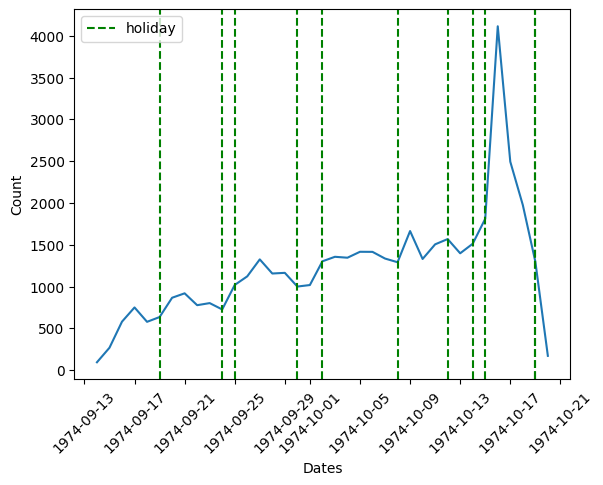

In [72]:
# TODO: plot order amount per day with holidays using matplotlib.
# Mark holidays with vertical lines.
# Hint: use plt.axvline.

fig, ax = plt.subplots()
lines_list = data_plot[data_plot['holiday'] == True]['date'].to_list()
ax.plot(data_plot['date'], data_plot['order_count'])
for number in lines_list:
    ax.axvline(x=number, color='green', linestyle='--')
ax.tick_params(axis='x', labelrotation=45)
ax.axvline(x=number, color='green', linestyle='--', label='holiday')
ax.legend()
plt.xlabel('Dates')
plt.ylabel('Count')
plt.show()
